Iris 데이터를 가지고 품종 분류를 해보자.
sklearn 에 내장된 데이터셋중 하나

peral: 꽃잎, sepal: 꽃받침

1. 데이터 준비 , 자세히 살펴보기



In [18]:
#데이터를 불러온다
from sklearn.datasets import load_iris
iris = load_iris()
print(type(dir(iris)))
#dir()는 객체가 어떤 변수와 메서드를 가지고 있는지 나열함

<class 'list'>


In [19]:
#iris 에 어떤 정보들이 담겼는지 keys() 라는 메서드로 확인
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [20]:
#가장 중요한 데이터는 iris_data 변수에 저장후 크기를 확인
iris_data = iris.data
print(iris_data.shape)

(150, 4)


In [21]:
iris_data[0]
#순서대로 sepal length, speal width, petal length, petal width

array([5.1, 3.5, 1.4, 0.2])

In [22]:
#우리는 꽃잎과 꽃받침의 길이가 주어지는 경우 그 세가지 품종 중 어떤것인지 를 맞추고 싶다
#머신러닝모델 에게 꽃잎, 꽃받침의 길이와 폭, 붓꽃의 품좀을 출력하도록 학습시켜야함
#여기서 모델이 출력해야 하는 정답을 라벨(label), 또는 타겟(target) 이라고 한다.

iris_label = iris.target
print(iris_label.shape)
iris_label

(150,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [23]:
#이 라벨에 넣은 타겟의 숫자는 무엇을 나타내는 걸까요?
#라벨의 이름은 target_names 에서 확인가능

iris.target_names

#순서대로 0 1 2

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [24]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [25]:
iris.feature_names
#4개의 각 feature에 대한 설명이 담겨있음.

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [26]:
iris.filename #데이터셋 파일이 저장된 경로

'/usr/local/lib/python3.7/dist-packages/sklearn/datasets/data/iris.csv'

2. 머신러닝 모델을 학습시키기 위한 문제지와 정답지 준비

In [27]:
#판다스는 파이썬에서 표 형태로 이루어진 2차원 배열 데이터를 다루는데 많이 쓰임
#iris 데이터 또한 행과 열이 있는 2차원 데이터이므로 pandas를 활용해보자

import pandas as pd
print(pd.__version__)

1.1.5


In [28]:
#붓꽃 데이터셋을 pandas 가 제공하는 DataFrame이라는 자료형으로 변환해보자

iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

In [29]:
#이해를 위해 iris_data와 iris.feature_names 를 출력해보자
print(iris_data)
print(iris.feature_names)


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [30]:
#이 두개를 불러와 만든 DataFrame을 살펴보자.
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [31]:
#정답 데이터도 함께 있다면 데이터를 다루기 더 편리하니, label 이라는 컬럼을 추가
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [32]:
iris_df["label"] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [33]:
#여기서 4가지의 feature 데이터들은 머신러닝 모델이 풀어야 하는 문제지와 같음.
#[5.1, 3.5, 1.4, 0.2] 라는 문제가 주어진다면 모델은 0 즉 setosa
#따라서 0,1,2 와 같이 표현된 label데이터는 머신러닝 모델에게 정답지이다.

#문제지: 머신러닝 모델에게 입력되는 데이터. feature 라고 부르기도한다. 변수로는 x를 많이 사용
#정답지: 모델이 맞추어야 하는 데이터. label 또는 target이라고 부르기도함.변수 이름으로 y를 많이사용


In [34]:
#머신러닝 모델을 학습시키려면 
#학습에 사용하는 training dataset
#모델의 성능을 평가하는 데 사용하는 test dataset으로 나누는 작업이 필요
#데이터셋을 분리하는것은 scikit-learn이 제공하는 train_test_split 이라는 함수로 간단히 가능.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_data,
                                                    iris_label,
                                                    test_size=0.2,
                                                    random_state=7)

print('X_train 개수: ', len(X_train), 'X_test 개수: ', len(X_test))


X_train 개수:  120 X_test 개수:  30


In [35]:
#첫번째 파라미터인 iris_data는 문제지, 즉 feature
#두번째 파라미터인 iris_label은 정답값, 즉 label

#이렇게 해서 4개의 feature 데이터만 있는 x 
#정답 데이터만 있는 y를 얻음

#세번째 인자인 test_size 로는 test dataset의 크기를 조정 가능 0.2는 전체의 20%

#마지막으로 쓴 random_state 는 train 데이터와 test 데이터를 분리하는데 적용되는 랜덤을 결정
#만약 이 데이터 그래도 학습용과 테스트용 데이터를 나눈다면 뒤쪽의 20%가 테스트용 데이터셋으로 만들어지기 때문에 
#테스트용 데이터셋은 라벨이 2인 데이터로만 구성됨
#그래서 데이터 분리시 랜덤으로 섞는 과정이 필요하고 random_state가 이 역할을 하게됨

#컴퓨터에서 랜덤은 특정 로직에 따라 결정되니 완벽한 랜덤은 아님
#그래서 랜덤을 조절할수 있는 값인 random_state, random_seed 를 사용
# 이 값이 같다면 코드는 항상 같은 랜덤 결과를 나타냄


In [36]:
#데이터셋을 확인
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


In [37]:
print(y_train)
print()
print( y_test)

#위에서 확인한 label 과는 다르게 0,1,2가 무작위로 섞여있다.

[2 1 0 2 1 0 0 0 0 2 2 1 2 2 1 0 1 1 2 0 0 0 2 0 2 1 1 1 0 0 0 1 2 1 1 0 2
 0 0 2 2 0 2 0 1 2 1 0 1 0 2 2 1 0 0 1 2 0 2 2 1 0 1 0 2 2 0 0 2 1 2 2 1 0
 0 2 0 0 1 2 2 1 1 0 2 0 0 1 1 2 0 1 1 2 2 1 2 0 1 1 0 0 0 1 1 0 2 2 1 2 0
 2 1 1 0 2 1 2 1 0]

[2 1 0 1 2 0 1 1 0 1 1 1 0 2 0 1 2 2 0 0 1 2 1 2 2 2 1 1 2 2]


3. 머신러닝 모델 학습시키기

In [38]:
#머신러닝은 지도학습(Supervised Learning), 비지도 학습(Unsupervised Learning)
# 지도학습은 정답이 있는 문제에 학습, 비지도 학습은 정답이 없는 문제를 학습

#지도학습은 두가지로 나뉘어짐
#분류(Classification)와 회귀(Regression)
#분류는 입력받은 데이터를 특정 카테고중 하나로 분류
#회귀는 입력받은 데이터에 따라 특정 필드의 수치를 맞추는 문제.

#붓꽃 품종은 분류문제
#회귀 문제의 예로 집에대한 정보(평수,위치,층수 등)를 입력받아 그 집의 가격을 맞추는 문제

#붓꽃 문제는 지도학습이며 분류 문제
#머신러닝 모델을 뭘 사용할지 명확해짐

#분류모델은 아주 다양 하지만 그중 Decision Tree 모델을 사용
#의사결정나무는 결정경계가 데이터 축에 수직이어서 특정 데이터만 잘 작동할 수 있다는 문제가 있음
#이를 극복하기위해 제안된 모델이 Random Forest, 여러개의 Decision Tree를 합쳐서 만들어 놓은 개념

#간단히 Decision Tree는 의사 결정을 할, 즉 데이터를 분리할 어던 경계를 찾아내
#데이터를 체에 거르듯 한단계씩 분류해 나가는 모델
#이 과정에 엔트로피, 정보량, 지니불손도 등의 개념이 포함. 머신러닝 알고리즘 이해를 위해 필수

#sklearn.tree 패키지 안에 DecisionTreeClassifier 라는 이름으로 내장되있음

from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)
print(decision_tree._estimator_type)



classifier


In [39]:
#모델학습
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=32, splitter='best')

In [40]:
#training dataset 으로 모델을 학습시킨다는 것은
#training dataset에 맞게 모델을 fitting, 맞추는 것
#training dataset에 있는 데이터들을 통해 어떠한 패턴을 파악하고,
#그 패턴에 맞게 예측을 할 수 있도록 학습되기 때문입니다.

#다른 말로 하면 모델은 training dataset에 존재하지 않는 데이터에 대해서는
#정확한 정답 카테고리가 무엇인지 알지 못함.
#다만 training dataset을 통해 학습한 패턴으로 
#새로운 데이터가 어떤 카테고리에 속할지 예측할 뿐.

#새로운 데이터에 대해서도 잘 맞출 수 있기 위해서
#training dataset이 어떻게 구성되어 있는지가 매우 중요
#더 다양한, 더 일반화 된 데이터로 학습이 될수록 새로운 데이터에 대해서도 잘 맞출 수 있음



4. 머신러닝 모델 평가하기

In [41]:
y_pred = decision_tree.predict(X_test)
y_pred

array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2])

In [42]:
#X_test데이터는 feature (문제) 만 존재 
#따라서 학습이 완료된 decision_tree 모델에 X_test 데이터로 predict를 실행하면
#모델이 예측한 y_pred를 얻게됨
#실제 정답인 y_test와 비교해보자
y_test

array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2,
       1, 2, 2, 2, 1, 1, 2, 2])

In [43]:
#성능평가에 대한 함수들이 모여있는 sklearn.metrics 패키지를 이용
#정확도Accuracy 를 간단히 확인
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

#전체 개수중 맞은것의 개수의 수치를 나타냄. 90퍼센트의 정확도
#정확도 = 예측결과가정답인데이터의개수 / 예측한전체데이터의개수

0.9

5. 다른 모델로 실습해보기

In [44]:
#다른 모델을 다루기 전에 Decision Tree 모델을 학습시키고 예측하는 과정을 복습

# 1.필요한 모듈 import 

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# 2.데이터 준비.

iris = load_iris()
iris_data = iris.data
iris_label = iris.target

# 3.train, test 데이터분리

X_train, X_test, y_train, y_test = train_test_split(iris_data,
                                                    iris_label,
                                                    test_size=0.2,
                                                    random_state=7)

# 4.모델 학습 및 예측
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.91      0.83      0.87        12
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



Decision Tree를 여러개 모아놓은 RandomForest. 
단일 모델을 여러 개 사용하는 방법을 취함으로써 모델 한 개만 사용할 때의 단점을 집단 지성으로 극복하는 개념의 기법인 앙상블

Random Forest의 Random은 무엇이 랜덤이라는 것을 나타내는가? 

여러개의 의사 결정 트리를 모아 놓은것으로, 각각의 의사 결정 트리를 만들기 위해 쓰이는 특성들을 랜덤으로 선택한다

In [45]:
#SVM 모델은 다음과 같이 사용합니다.
from sklearn import svm
svm_model = svm.SVC()
print(svm_model._estimator_type)

classifier


In [46]:
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.83      0.83      0.83        12
           2       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.88        30
weighted avg       0.87      0.87      0.87        30



In [47]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier()
print(sgd_model._estimator_type)

classifier


In [48]:
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.83      0.42      0.56        12
           2       0.65      1.00      0.79        11

    accuracy                           0.73        30
   macro avg       0.78      0.76      0.73        30
weighted avg       0.77      0.73      0.71        30



In [49]:
# Logistic Regression 
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
print(logistic_model._estimator_type)

classifier


In [50]:
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.83      0.83      0.83        12
           2       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.88        30
weighted avg       0.87      0.87      0.87        30



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


오차행렬 iris



In [51]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [52]:
digits_data = digits.data
digits_data.shape

(1797, 64)

In [53]:
digits_data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

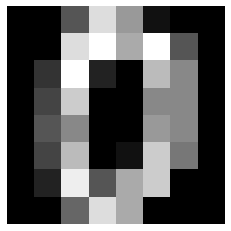

In [54]:
#이미지를 보기위해 맷플랏립 임포트
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digits.data[0].reshape(8,8), cmap='gray')
plt.axis('off')
plt.show()

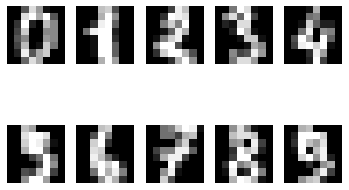

In [55]:
#여러 개의 이미지를 한번에 확인하기

for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(digits.data[i].reshape(8,8), cmap='gray')
  plt.axis('off')
plt.show()

In [56]:
#target 데이터는 어떨까
digits_label = digits.target
print(digits_label.shape)
digits_label[:20]

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [57]:
#정확도의 함정을 확인하기 위해, 해당 이미지의 데이터가 3인지 아닌지를 맞추는 문제로 변형
#입력된 데이터가 3이라면 3을, 3이 아닌 다른 숫자라면 0을 출력

new_label = [3 if i == 3 else 0 for i in digits_label]
new_label[:20]

[0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0]

In [58]:
#이 문제를 풀기 위해 다시 Decision Tree를 학습

X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                    new_label,
                                                    test_size=0.2,
                                                    random_state=15)
decision_tree = DecisionTreeClassifier(random_state=15)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9388888888888889

In [59]:
fake_pred = [0] * len(y_pred)

accuracy = accuracy_score(y_test, fake_pred)
accuracy

0.925

정답과 오답에도 종류가 있다!
정답과 오답을 구분하여 표현하는 방법을 오차행렬(confusion matrix)이라고 합니다.


In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[320,  13],
       [  9,  18]])

In [61]:
confusion_matrix(y_test, fake_pred)

array([[333,   0],
       [ 27,   0]])

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       333
           3       0.58      0.67      0.62        27

    accuracy                           0.94       360
   macro avg       0.78      0.81      0.79       360
weighted avg       0.94      0.94      0.94       360



In [64]:
print(classification_report(y_test, fake_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       333
           3       0.00      0.00      0.00        27

    accuracy                           0.93       360
   macro avg       0.46      0.50      0.48       360
weighted avg       0.86      0.93      0.89       360



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
accuracy_score(y_test, y_pred), accuracy_score(y_test, fake_pred)

(0.9388888888888889, 0.925)

위의 과정을보면 fake_pred 에서 3은 하나도 맞추지 않았지만 정확도를 비교해보았을때 
y_pred와 크게 차이나지 않는다

모델의 성능은 정확도 만으로 평가하면 안된다
특히나 label이 불균형하게 분포되어 있는 데이터를 다룰 때에는 더 조심해야 한다. 